In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

In [8]:
sd = pd.read_csv('AppStore-Dataset1.csv')

In [9]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

In [13]:
sd.head()

,App_name,Category,Rating,user's comments,Size,installations,Price,Content Rating,Genres,Latest Update,Latest Version,App Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",0,Teen,Social,03-Aug-18,Varies with device,Varies with device
1,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",0,Everyone,Communication,02-Aug-18,Varies with device,Varies with device
2,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",0,Everyone,Tools,03-Aug-18,Varies with device,Varies with device
3,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",0,Everyone,Communication,01-Aug-18,Varies with device,Varies with device
4,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,"1,000,000,000+",0,Everyone,Productivity,06-Aug-18,Varies with device,Varies with device


In [5]:
sd.shape

(9612, 12)

In [6]:
sd.drop_duplicates(subset=['App_name']).shape


(9612, 12)

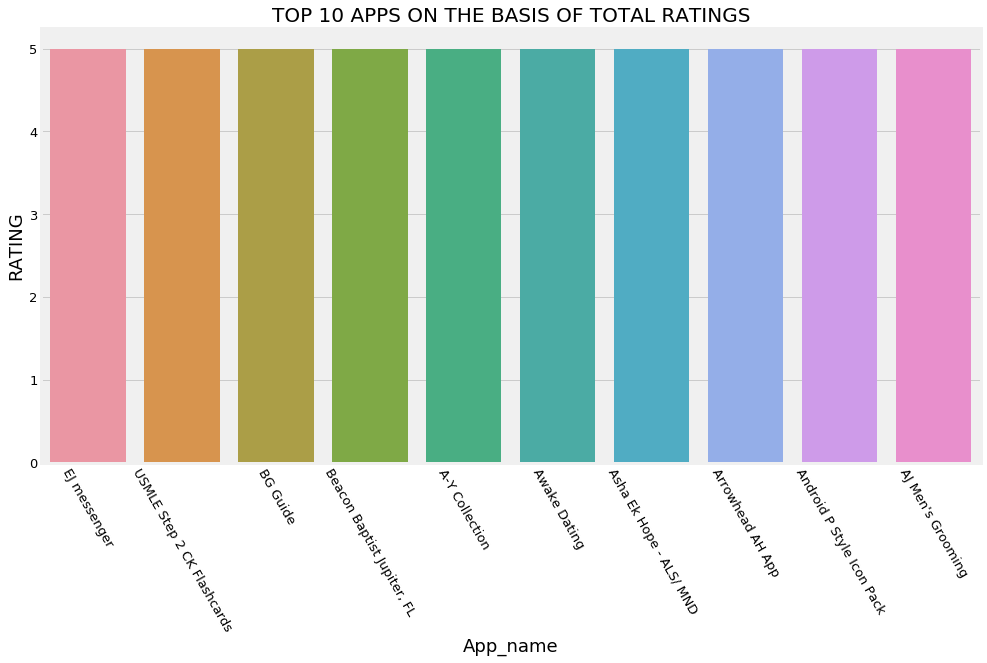

In [28]:
store_data_sorted = sd.sort_values('Rating', ascending=False)
subset_store_data_sorted = store_data_sorted[:10]

visualizer(subset_store_data_sorted.App_name, subset_store_data_sorted.Rating, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
          "App_name", "RATING", True, -60)

Text(0.5, 1.0, 'Distribution of Rating')

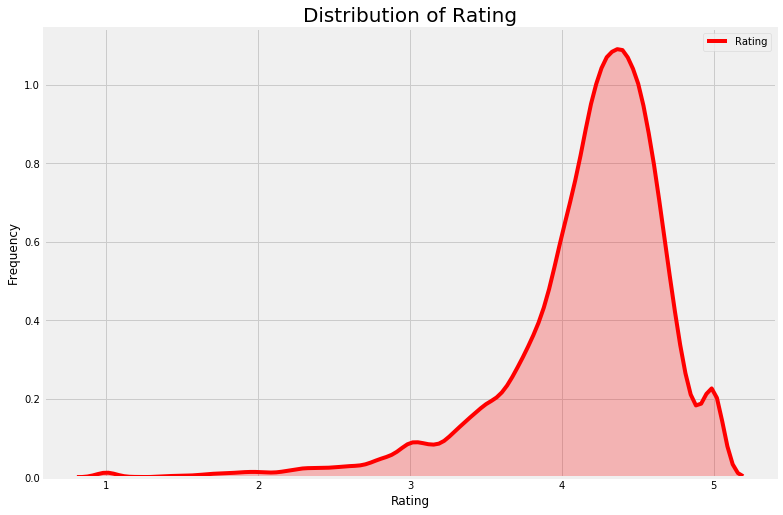

In [29]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(sd.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [30]:
#Average of rating of application in store is around 4.5 which is very high

In [31]:
print('Different types of App Categories as present in the dataset are: ')
print('--------------------------------------------------------------------')

count = 1
for i in sd['Category'].unique():
    print(count,': ',i)
    count = count + 1

Different types of App Categories as present in the dataset are: 
--------------------------------------------------------------------
1 :  SOCIAL
2 :  COMMUNICATION
3 :  TOOLS
4 :  PRODUCTIVITY
5 :  NEWS_AND_MAGAZINES
6 :  PHOTOGRAPHY
7 :  BOOKS_AND_REFERENCE
8 :  ENTERTAINMENT
9 :  VIDEO_PLAYERS
10 :  TRAVEL_AND_LOCAL
11 :  GAME
12 :  MAPS_AND_NAVIGATION
13 :  BUSINESS
14 :  MEDICAL
15 :  HEALTH_AND_FITNESS
16 :  FAMILY
17 :  HOUSE_AND_HOME
18 :  DATING
19 :  PERSONALIZATION
20 :  FINANCE
21 :  SHOPPING
22 :  SPORTS
23 :  WEATHER
24 :  LIFESTYLE
25 :  LIBRARIES_AND_DEMO
26 :  AUTO_AND_VEHICLES
27 :  EDUCATION
28 :  PARENTING
29 :  FOOD_AND_DRINK
30 :  COMICS
31 :  EVENTS
32 :  BEAUTY
33 :  ART_AND_DESIGN


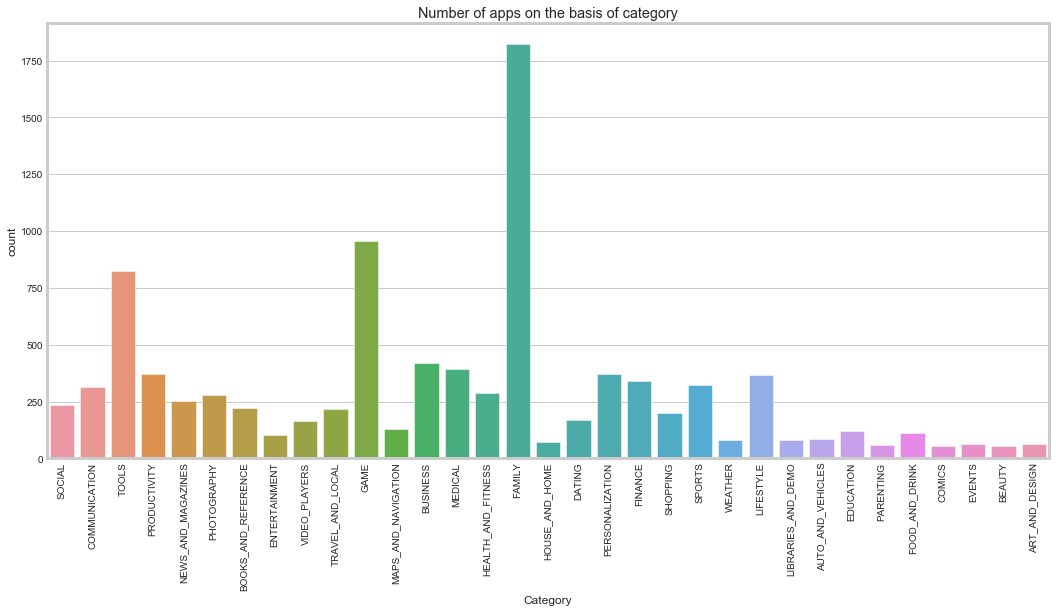

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Number of apps on the basis of category')
sns.countplot(x='Category',data = sd)
plt.xticks(rotation=90)
plt.show()

In [33]:
#Most of the apps in the app store belong to the Family category followed by Games category.

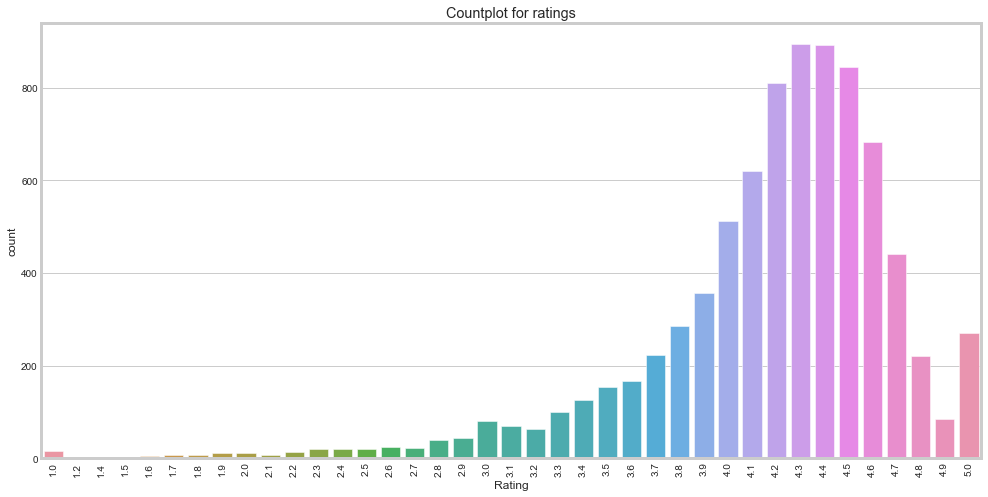

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = sd)
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()

In [35]:
rating_greater_4 = len(sd[sd['Rating'] >= 4])/len(sd)*100
print('Percentage of Apps having ratings of 4 or greater: {}%'.format(round(rating_greater_4,2)))

Percentage of Apps having ratings of 4 or greater: 65.26%


In [36]:
sd['Size'] = sd['Size'].apply(lambda x: str(x).replace('M',''))
sd['Size'] = sd['Size'].apply(lambda x: str(x).replace('k','e-3'))

In [37]:
#Converting the data type of Size category to float wherever possible
def convert(val):
    try:
        return float(val)
    except:
        return val
sd['Size'] = sd['Size'].apply(lambda x: convert(x))

In [38]:
sized = sd[sd['Size'] != 'Varies with device'].copy()

In [39]:
sized['Size'] = pd.to_numeric(sized['Size'])

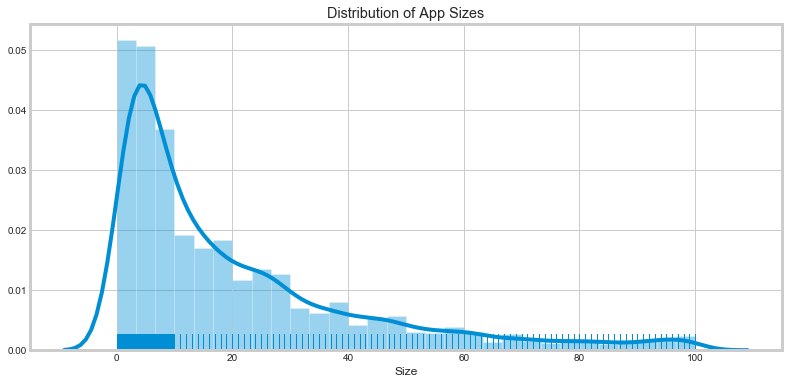

In [40]:
plt.figure(figsize=(12,6))
plt.title('Distribution of App Sizes')
sns.distplot(sized['Size'],bins = 30,rug=True)
plt.show()

In [41]:
sized.describe()

,Rating,user's comments,Size
count,7003.000000,8.387000e+03,8387.000000
mean,4.161145,1.212738e+05,20.438687
std,0.559335,9.388151e+05,21.853125
min,1.000000,0.000000e+00,0.008500
25%,4.000000,1.700000e+01,4.600000
50%,4.300000,4.860000e+02,12.000000
75%,4.500000,1.576400e+04,28.000000
max,5.000000,4.489172e+07,100.000000


In [42]:
print('Apps on the basis of Content Rating are classified as')
print('-------------------------------------------------------------------')

count = 1
for i in sd['Content Rating'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Content Rating are classified as
-------------------------------------------------------------------
1 :  Teen
2 :  Everyone
3 :  Everyone 10+
4 :  Mature 17+
5 :  Adults only 18+
6 :  Unrated


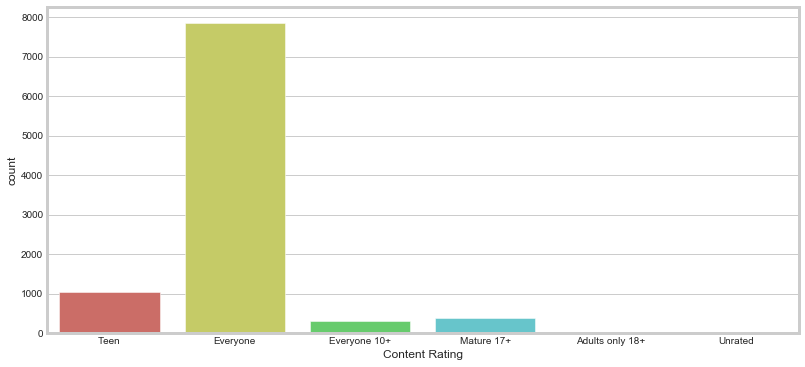

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x=sd['Content Rating'],palette='hls')
plt.show()

In [44]:
print('Percentage of Apps having content rating as everyone: {}%'.format(round(len(sd[sd['Content Rating'] == 'Everyone'])/len(sd)*100,2)))

Percentage of Apps having content rating as everyone: 81.82%


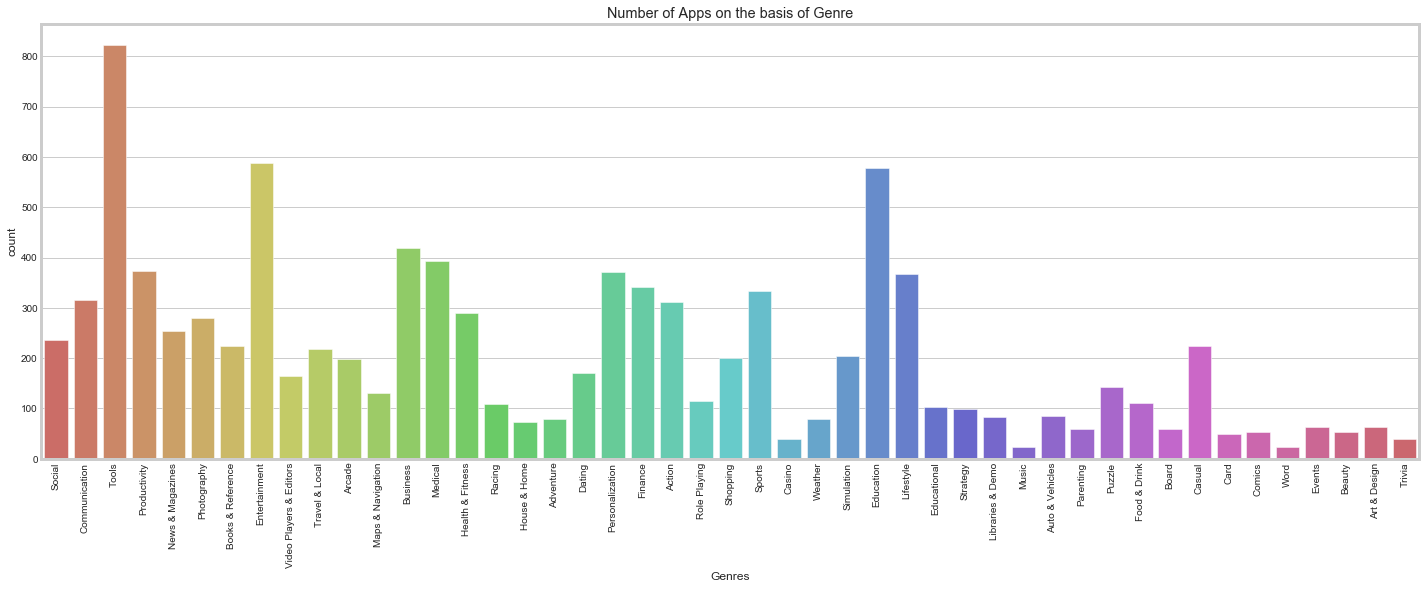

In [45]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Genre')
sns.countplot(x='Genres',data = sd,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [46]:
print('Total Number of Genres: ',sd['Genres'].nunique())

Total Number of Genres:  47


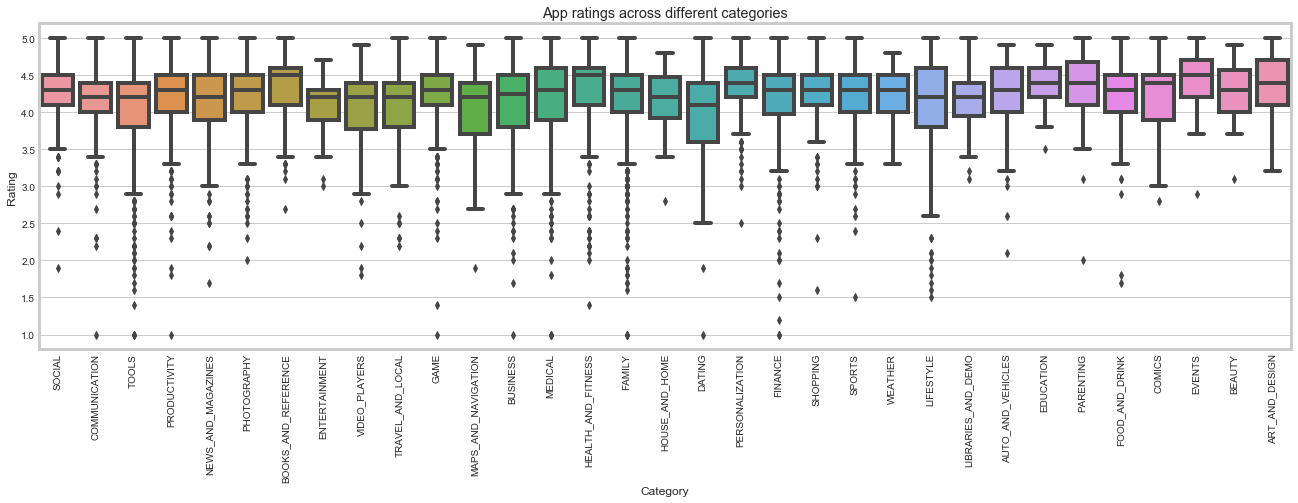

In [47]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Category',y='Rating',data = sd)
plt.xticks(rotation=90)
plt.title('App ratings across different categories')
plt.show()

In [48]:
rating = pd.DataFrame(sd['Rating'].describe()).T
rating

,count,mean,std,min,25%,50%,75%,max
Rating,8171.0,4.1737,0.536743,1.0,4.0,4.3,4.5,5.0


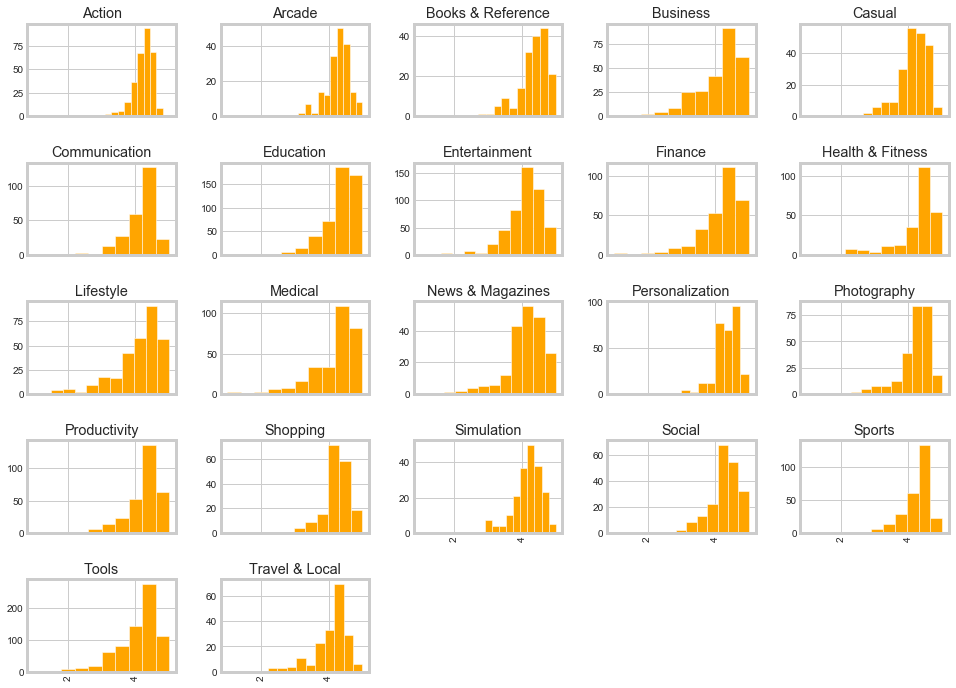

In [49]:
groups = sd.groupby('Genres').filter(lambda x: len(x) > 178)
groups['Rating'].hist(by=groups['Genres'], sharex=True, figsize=(16,12),color="orange")
plt.show()

In [50]:
sd.info()
sd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 12 columns):
App_name           9612 non-null object
Category           9612 non-null object
Rating             8171 non-null float64
user's comments    9612 non-null int64
Size               9612 non-null object
installations      9612 non-null object
Price              9612 non-null object
Content Rating     9612 non-null object
Genres             9612 non-null object
Latest Update      9612 non-null object
Latest Version     9605 non-null object
App Ver            9612 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 901.2+ KB


,Rating,user's comments
count,8171.000000,9.612000e+03
mean,4.173700,2.171133e+05
std,0.536743,1.835103e+06
min,1.000000,0.000000e+00
25%,4.000000,2.500000e+01
50%,4.300000,9.790000e+02
75%,4.500000,2.954100e+04
max,5.000000,7.815831e+07


In [51]:
sd.Price[sd.Price == 'Free'] = '$0'

In [52]:
print('Apps on the basis of Type are classified as')
print('--------------------------------------------------------------------')

count = 1
for i in sd['Price'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Type are classified as
--------------------------------------------------------------------
1 :  0
2 :  $2.49 
3 :  $2.99 
4 :  $0.99 
5 :  $4.99 
6 :  $5.99 
7 :  $6.99 
8 :  $1.99 
9 :  $3.08 
10 :  $16.99 
11 :  $33.99 
12 :  $1.29 
13 :  $1.50 
14 :  $3.99 
15 :  $14.99 
16 :  $19.40 
17 :  $5.49 
18 :  $3.49 
19 :  $10.99 
20 :  $1.49 
21 :  $7.49 
22 :  $9.99 
23 :  $29.99 
24 :  $7.99 
25 :  $10.00 
26 :  $8.49 
27 :  $19.99 
28 :  $379.99 
29 :  $399.99 
30 :  $37.99 
31 :  $4.49 
32 :  $15.46 
33 :  $74.99 
34 :  $1.61 
35 :  $4.29 
36 :  $1.70 
37 :  $4.84 
38 :  $79.99 
39 :  $2.56 
40 :  $109.99 
41 :  $28.99 
42 :  $3.90 
43 :  $2.59 
44 :  $12.99 
45 :  $3.28 
46 :  $11.99 
47 :  $389.99 
48 :  $18.99 
49 :  $299.99 
50 :  $400.00 
51 :  $1.59 
52 :  $24.99 
53 :  $2.95 
54 :  $1.20 
55 :  $17.99 
56 :  $1.97 
57 :  $2.50 
58 :  $3.04 
59 :  $4.80 
60 :  $1.96 
61 :  $46.99 
62 :  $3.61 
63 :  $2.00 
64 :  $6.49 
65 :  $25.99 
66 :  $89.99 
67 :  $3.9

In [53]:
#sd[sd.Price[1:]].replace('[\$,]', '', regex=True).astype(float)
sd['Price'] = sd.Price.str.replace('$', '').astype(float)

In [54]:
sd.dtypes

App_name            object
Category            object
Rating             float64
user's comments      int64
Size                object
installations       object
Price              float64
Content Rating      object
Genres              object
Latest Update       object
Latest Version      object
App Ver             object
dtype: object

In [55]:
print ('1. Free apps are ' + str(sum(sd.Price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(sd.Price > 50)))
print (' -  which is around ' + str(sum(sd.Price > 50)/len(sd.Price)*100) +
       " % of the total Apps")
print (' Thus we will dropping the following apps')
outlier=sd[sd.Price>50][['App_name','Price','Genres','Rating']]
freeapps = sd[sd.Price==0]
outlier

1. Free apps are 8869
2. Counting (outliers) super expensive apps 17
 -  which is around 0.1768622555139409 % of the total Apps
 Thus we will dropping the following apps


,App_name,Price,Genres,Rating
2024,I am extremely Rich,379.99,Lifestyle,2.9
2025,I am rich (Most expensive app),399.99,Finance,4.1
2027,I AM RICH PRO PLUS,399.99,Finance,4.0
2028,I am Rich!,399.99,Finance,3.8
2063,Language Therapy: Aphasia,74.99,Medical,NaN
2287,Vargo Anesthesia Mega App,79.99,Medical,4.6
2331,BP Fitness Lead Scanner,109.99,Events,NaN
3943,I Am Rich,389.99,Entertainment,3.6
3944,I am Rich Plus,399.99,Entertainment,4.0
3946,I am rich VIP,299.99,Lifestyle,3.8


In [56]:
paidapps =sd[((sd.Price<100) & (sd.Price>0))]
print('Now the max price of any app in new data is : ' + str(max(paidapps.Price)))
print('Now the min price of any app in new data is : ' + str(min(paidapps.Price)))
#paidapps.prime_genre.value_counts()

Now the max price of any app in new data is : 89.99
Now the min price of any app in new data is : 0.99


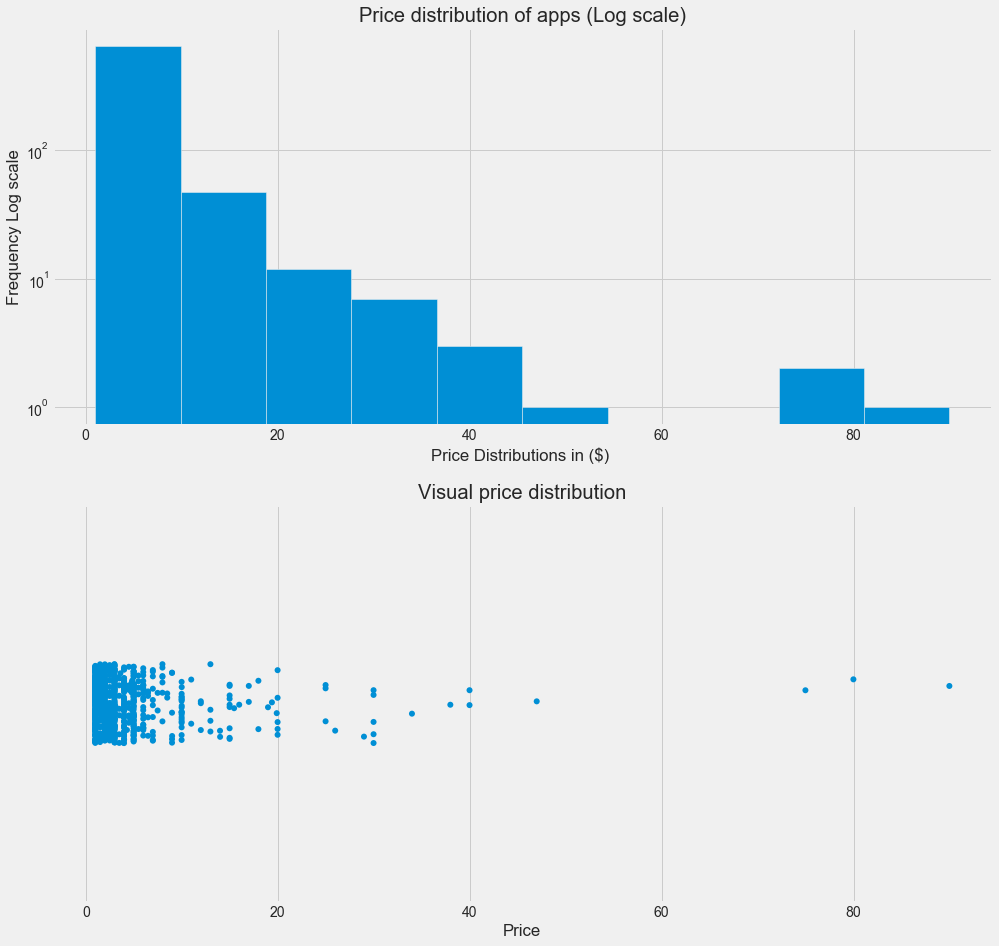

In [57]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(paidapps.Price,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paidapps,y='Price',jitter= True,orient = 'h' ,size=6)
plt.show()

In [58]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

sd['category']= sd.Price.apply(lambda x : paid(x))
sd.tail()

,App_name,Category,Rating,user's comments,Size,installations,Price,Content Rating,Genres,Latest Update,Latest Version,App Ver,category
9607,WISE- MOBILE PORTAL,TOOLS,NaN,3,1,500+,0.0,Everyone,Tools,30-Jul-15,1.0.0.4,2.2 and up,Free
9608,Word Hunt,GAME,4.9,59,21,500+,0.0,Everyone,Word,22-Jun-18,1,4.4 and up,Free
9609,WPBS-DT,FAMILY,5.0,3,6.3,500+,0.0,Everyone,Entertainment,03-Apr-15,4.1.1,2.3.3 and up,Free
9610,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3.8,500+,0.0,Everyone,Entertainment,12-Jan-18,2,4.0 and up,Free
9611,YourTube Video Views BG,VIDEO_PLAYERS,NaN,8,2.5,500+,0.0,Everyone,Video Players & Editors,12-Nov-15,1.1.1,4.0 and up,Free


In [59]:

sd.loc[(sd['Price'] > 0) & (sd['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
sd.loc[(sd['Price'] > 0.99) & (sd['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
sd.loc[(sd['Price'] > 2.99) & (sd['Price'] <= 4.99), 'PriceBand']   = '3 normal'
sd.loc[(sd['Price'] > 4.99) & (sd['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
sd.loc[(sd['Price'] > 14.99) & (sd['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
sd.loc[(sd['Price'] > 29.99), 'PriceBand']  = '6 most expensive'

In [60]:
sd[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,1 cheap,4.298077
1,2 not cheap,4.293220
2,3 normal,4.237838
3,4 expensive,4.235897
4,5 too expensive,4.238889
5,6 most expensive,3.894118


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

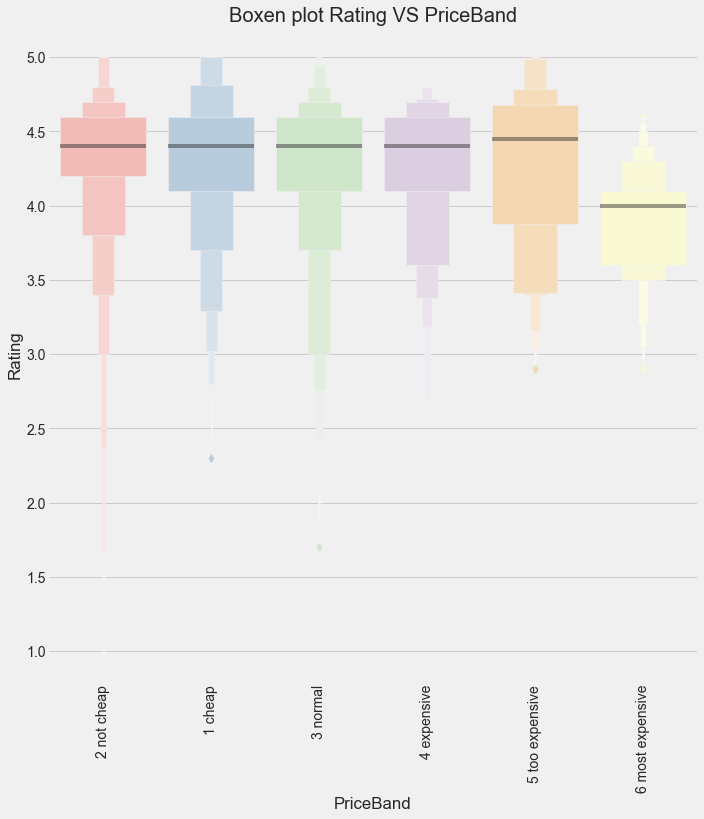

In [61]:
g = sns.catplot(x="PriceBand",y="Rating",data=sd, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

In [62]:
#Price are  effect to rating , if it is too expensive, it might get more rating

Text(0.5, 1.0, 'Price (0-15$) - Rating')

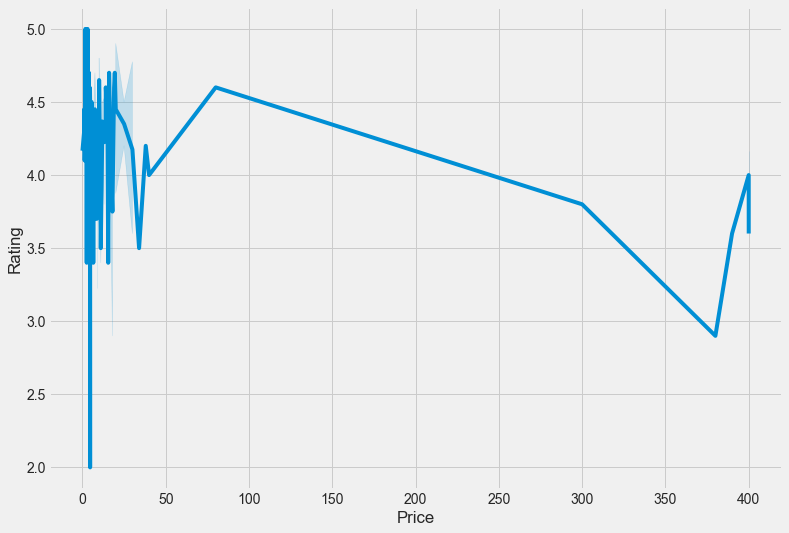

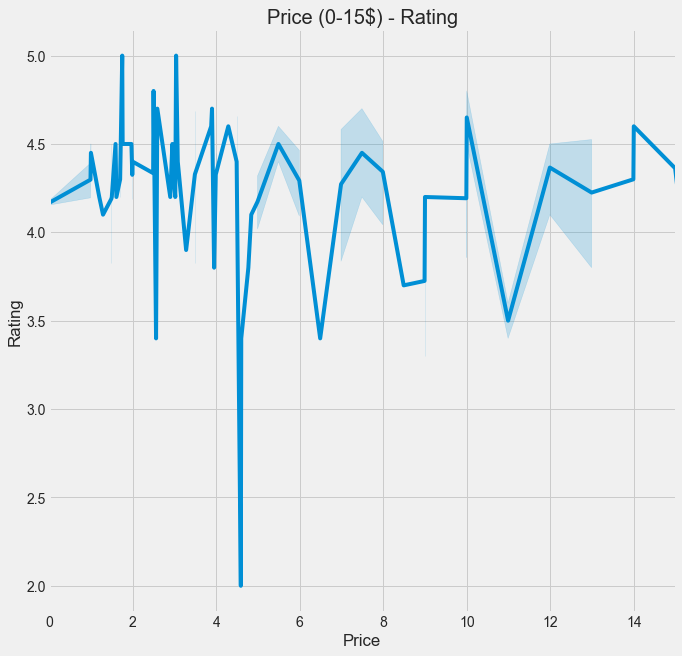

In [63]:
g = sns.lineplot(x="Price", y="Rating", data=sd)

plt.figure(figsize=(10,10))
g = sns.lineplot(x="Price", y="Rating", data=sd)
g.set(xlim=(0, 15))
plt.title('Price (0-15$) - Rating',size = 20)

In [70]:
sd.to_csv(r'C:\Users\enas\Desktop\AppStore-Dataset1.csv')